In [1]:
# 🔹 Linear Classification using Logistic Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
# 1️⃣ Load dataset
data = pd.read_csv("BankNote_Authentication.csv")
print(data.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


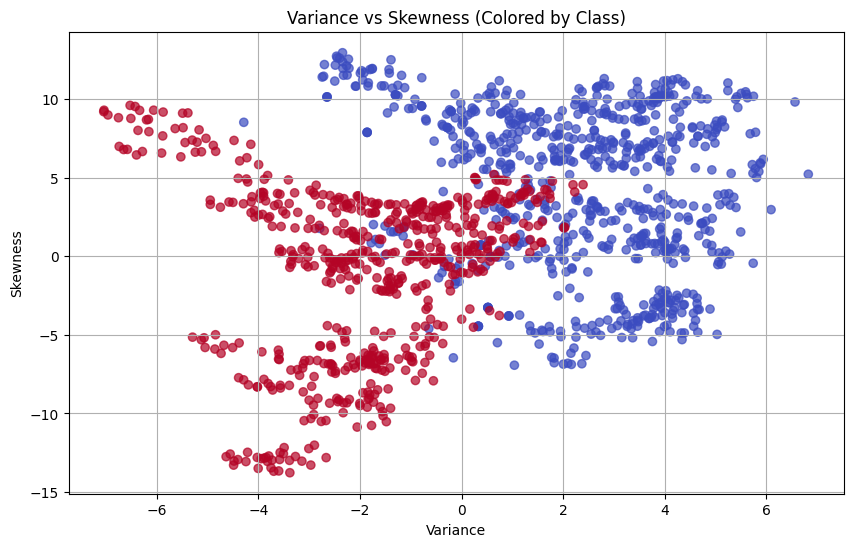

In [15]:

plt.figure(figsize=(10,6))
plt.scatter(data["variance"], data["skewness"],
            c=data["class"], cmap='coolwarm', alpha=0.7)
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.title("Variance vs Skewness (Colored by Class)")
plt.grid(True)
plt.show()

In [3]:
# 2️⃣ Split into features and target
X = data[['variance', 'skewness', 'curtosis', 'entropy']]
y = data['class']

In [4]:
# 3️⃣ Divide dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")


Train size: (1097, 4), Test size: (275, 4)


In [8]:
# 4️⃣ Fit Logistic Regression (without L2 regularization)
model_no_reg = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
model_no_reg.fit(X_train, y_train)
y_pred_no_reg = model_no_reg.predict(X_test)
acc_no_reg = accuracy_score(y_test, y_pred_no_reg)
print(f"Without Regularization: {acc_no_reg:.4f}")


Without Regularization: 0.9855


In [9]:
# 5️⃣ Fit Logistic Regression (with L2 regularization)
model_l2 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
acc_l2 = accuracy_score(y_test, y_pred_l2)
print(f"With L2 Regularization:  {acc_l2:.4f}")

With L2 Regularization:  0.9855


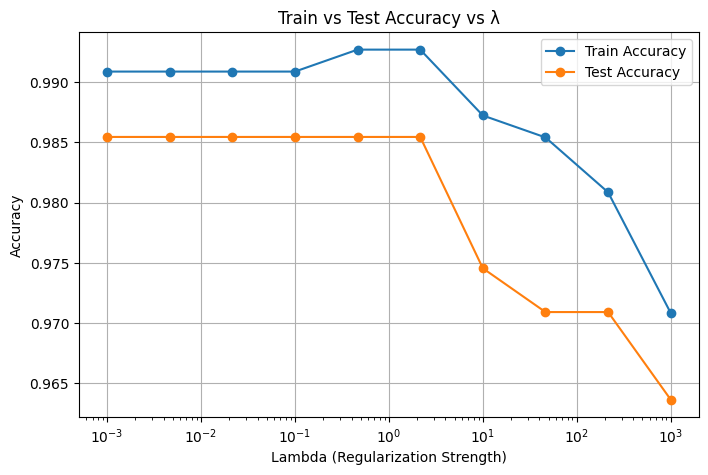

In [10]:
# 6️⃣ Plot training and test accuracy vs λ
lambdas = np.logspace(-3, 3, 10)
train_acc = []
test_acc = []

for lam in lambdas:
    model = LogisticRegression(C=1/lam, solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(lambdas, train_acc, marker='o', label='Train Accuracy')
plt.plot(lambdas, test_acc, marker='o', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy vs λ')
plt.legend()
plt.grid(True)
plt.show()

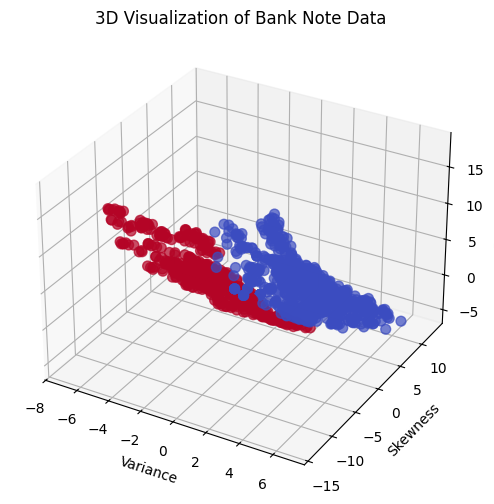

In [11]:
# 7️⃣ 3D Visualization
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['variance'], data['skewness'], data['curtosis'],
           c=data['class'], cmap='coolwarm', s=50, alpha=0.7)
ax.set_xlabel('Variance')
ax.set_ylabel('Skewness')
ax.set_zlabel('Curtosis')
plt.title('3D Visualization of Bank Note Data')
plt.show()

In [12]:
# 8️⃣ Add outliers intentionally
X_train_outlier = X_train.copy()
n_outliers = int(0.05 * len(X_train_outlier))
indices = np.random.choice(X_train_outlier.index, n_outliers, replace=False)
X_train_outlier.loc[indices] += np.random.normal(5, 2, X_train_outlier.shape[1])
print(f"\n Added {n_outliers} outliers to training data.")


 Added 54 outliers to training data.


In [14]:
# 9️⃣ Train Logistic Regression on outlier data
model_outlier = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
model_outlier.fit(X_train_outlier, y_train)
acc_outlier = model_outlier.score(X_test, y_test)
print(f"\nAccuracy after adding outliers: {acc_outlier:.4f}")

print("\n Observation:")
print("Logistic Regression performs well on clean data (high accuracy).")
print("L2 regularization improves generalization.")
print("Adding outliers slightly reduces performance, but L2 helps control their effect.")


Accuracy after adding outliers: 0.9673

 Observation:
Logistic Regression performs well on clean data (high accuracy).
L2 regularization improves generalization.
Adding outliers slightly reduces performance, but L2 helps control their effect.


In [21]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score
)
import seaborn as sns

In [24]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

#  Use the L2-regularized model
y_pred_l2 = model_l2.predict(X_test)
y_proba_l2 = model_l2.predict_proba(X_test)[:, 1]

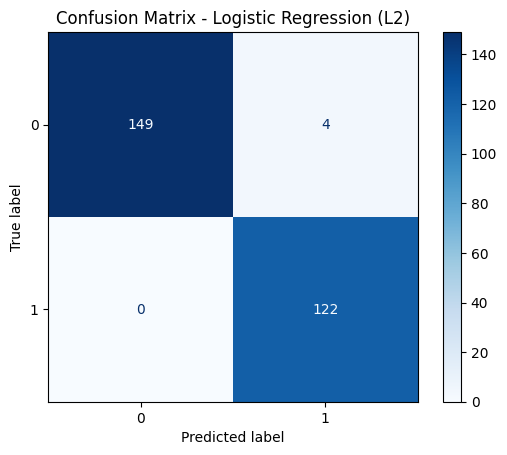

In [25]:
# 1️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_l2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_l2.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (L2)")
plt.show()

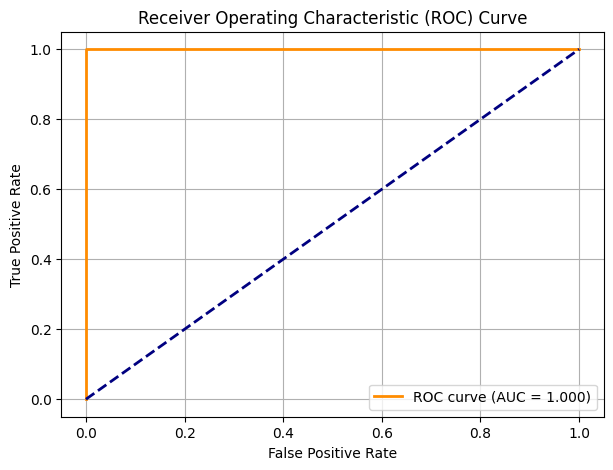

In [26]:
# 2️⃣ ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_l2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


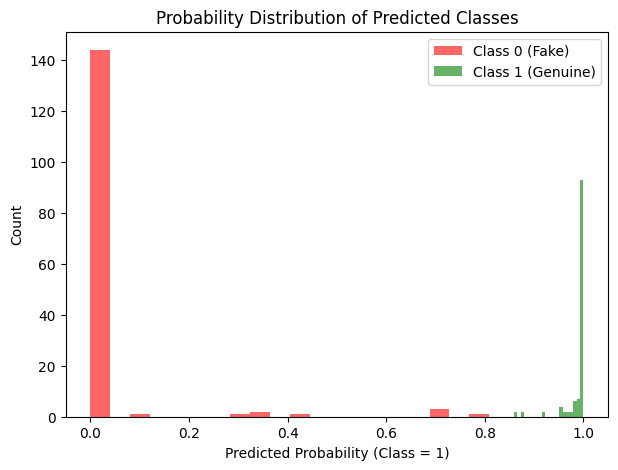

In [27]:
# 3️⃣ Probability Distribution
plt.figure(figsize=(7,5))
plt.hist(y_proba_l2[y_test==0], bins=20, alpha=0.6, label='Class 0 (Fake)', color='red')
plt.hist(y_proba_l2[y_test==1], bins=20, alpha=0.6, label='Class 1 (Genuine)', color='green')
plt.xlabel('Predicted Probability (Class = 1)')
plt.ylabel('Count')
plt.title('Probability Distribution of Predicted Classes')
plt.legend()
plt.show()